# Number of repeats against time taken for doing repetitive task via multiprocessing

This function will be run n times, with the same input:

In [1]:
def myfunc(b):
    
    x=0
    a=2
    
    for i in range(100000):
        x+=a*i/b*(i+1) 

I'll also write this function as an auxiliary file 'defs.py', as in some versions of Python you need to do that to be able to send it multiple cores.

In [2]:
import defs
import time
from multiprocessing import Pool

Time how long it takes to run for 1 uo to 20 repetitions, sending to as many cores as are available:

In [3]:
times=[]

for p in range(1,20):
    starttime=time.time()
    
    # Create p processes
    mappool = Pool(processes=p)

    # Create p copies of the input to the function
    inputs=[]
    b=1
    for i in range(p):
        inputs.append(b)

    # Run the function p times using all the cores available.
    mapresults=mappool.map(defs.myfunc,inputs)
    mappool.close()
    
    endtime=time.time()
    timetaken=endtime-starttime
    
    times.append(timetaken)
    print(p)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Plot the results

In [4]:
import matplotlib.pyplot as plt

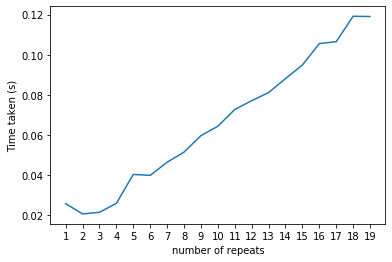

In [7]:
c=[]
for p in range(1,20):
    c.append(p)

plt.plot(c,times)
plt.xlabel("number of repeats")
plt.ylabel("Time taken (s)")
plt.xticks(c)
plt.show()

My computer has 4 cores. So naively one might expect the graph to be almost flat for 1-4 repetitions, then see a big jump, then almost flat for 5-8 repetitions, then a big jump, and so on. But it's not as simple as that! The time overhead of communication between cores complicates things, as well as the presence of other processes going on in the CPU.